Forecast the Cocacola data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [2]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [3]:
cocacola['Year'] = cocacola['Quarter'].apply(lambda x: int(x.split('_')[1]))
cocacola['Quarter'] = cocacola['Quarter'].apply(lambda x: int(x.split('_')[0][1:]))

In [4]:
cocacola = cocacola[['Quarter', 'Year','Sales']]

In [5]:
cocacola.head()

,Quarter,Year,Sales
0,1,86,1734.827000
1,2,86,2244.960999
2,3,86,2533.804993
3,4,86,2154.962997
4,1,87,1547.818996


In [6]:
cocacola.describe()

,Quarter,Year,Sales
count,42.000000,42.000000,42.000000
mean,2.452381,90.761905,2994.353308
std,1.130560,3.074756,977.930896
min,1.000000,86.000000,1547.818996
25%,1.250000,88.000000,2159.714247
50%,2.000000,91.000000,2782.376999
75%,3.000000,93.000000,3609.250000
max,4.000000,96.000000,5253.000000


In [7]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     int64  
 1   Year     42 non-null     int64  
 2   Sales    42 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


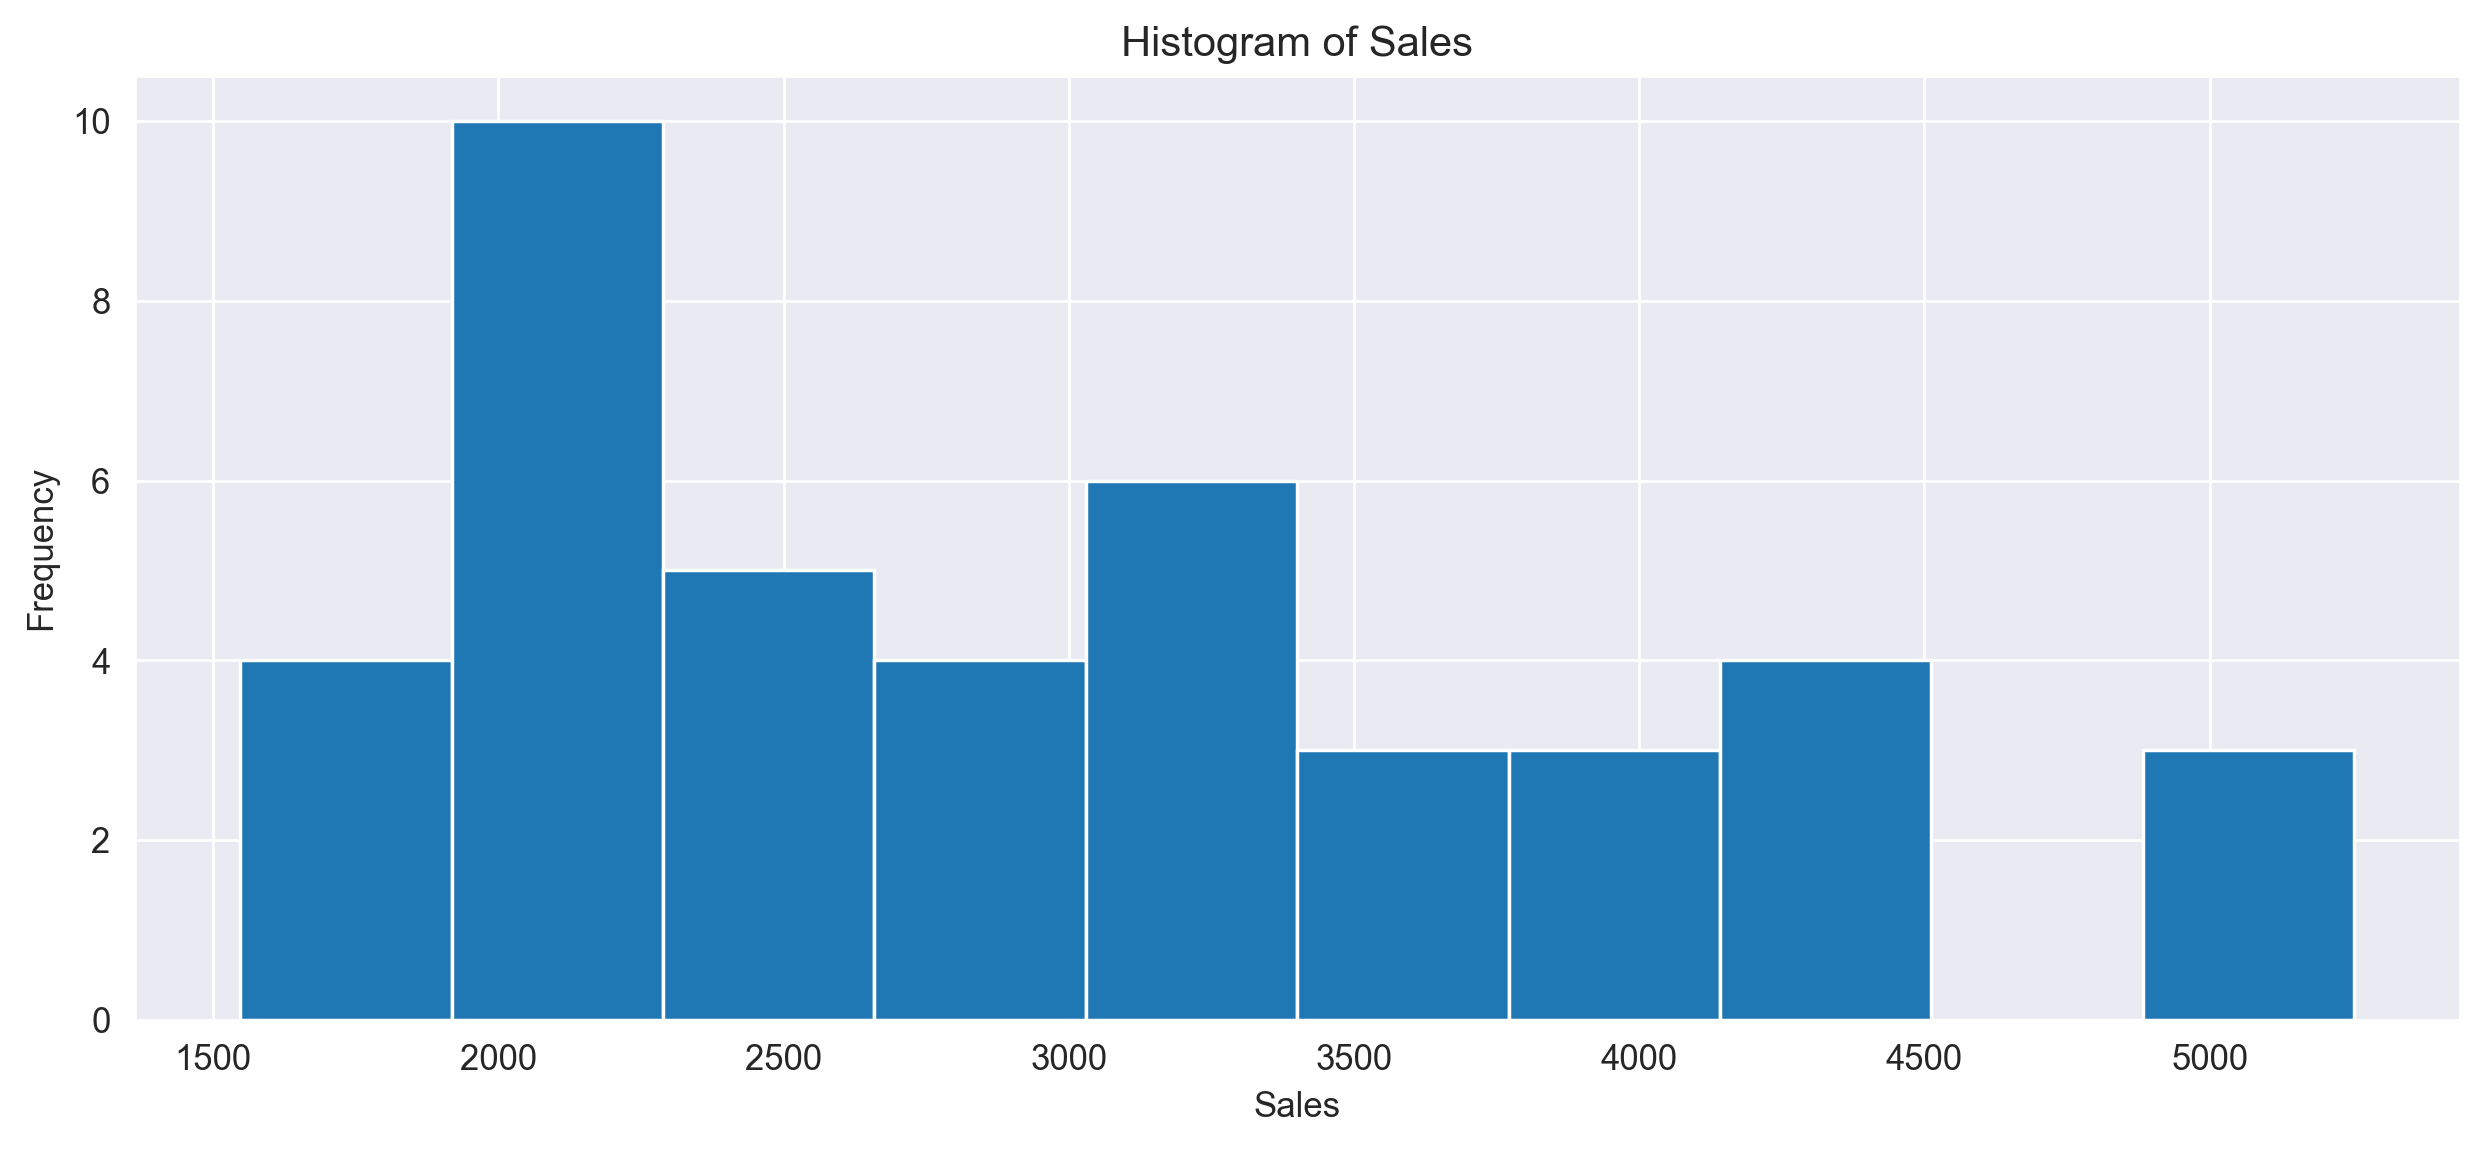

In [90]:
plt.figure(figsize=(12,5))
plt.hist(cocacola['Sales'], bins=10)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')
plt.show()

In [9]:
cocacola['log_Sales'] = np.log(cocacola['Sales'])

In [10]:
cocacola.head()

,Quarter,Year,Sales,log_Sales
0,1,86,1734.827000,7.458663
1,2,86,2244.960999,7.716443
2,3,86,2533.804993,7.837477
3,4,86,2154.962997,7.675529
4,1,87,1547.818996,7.344602


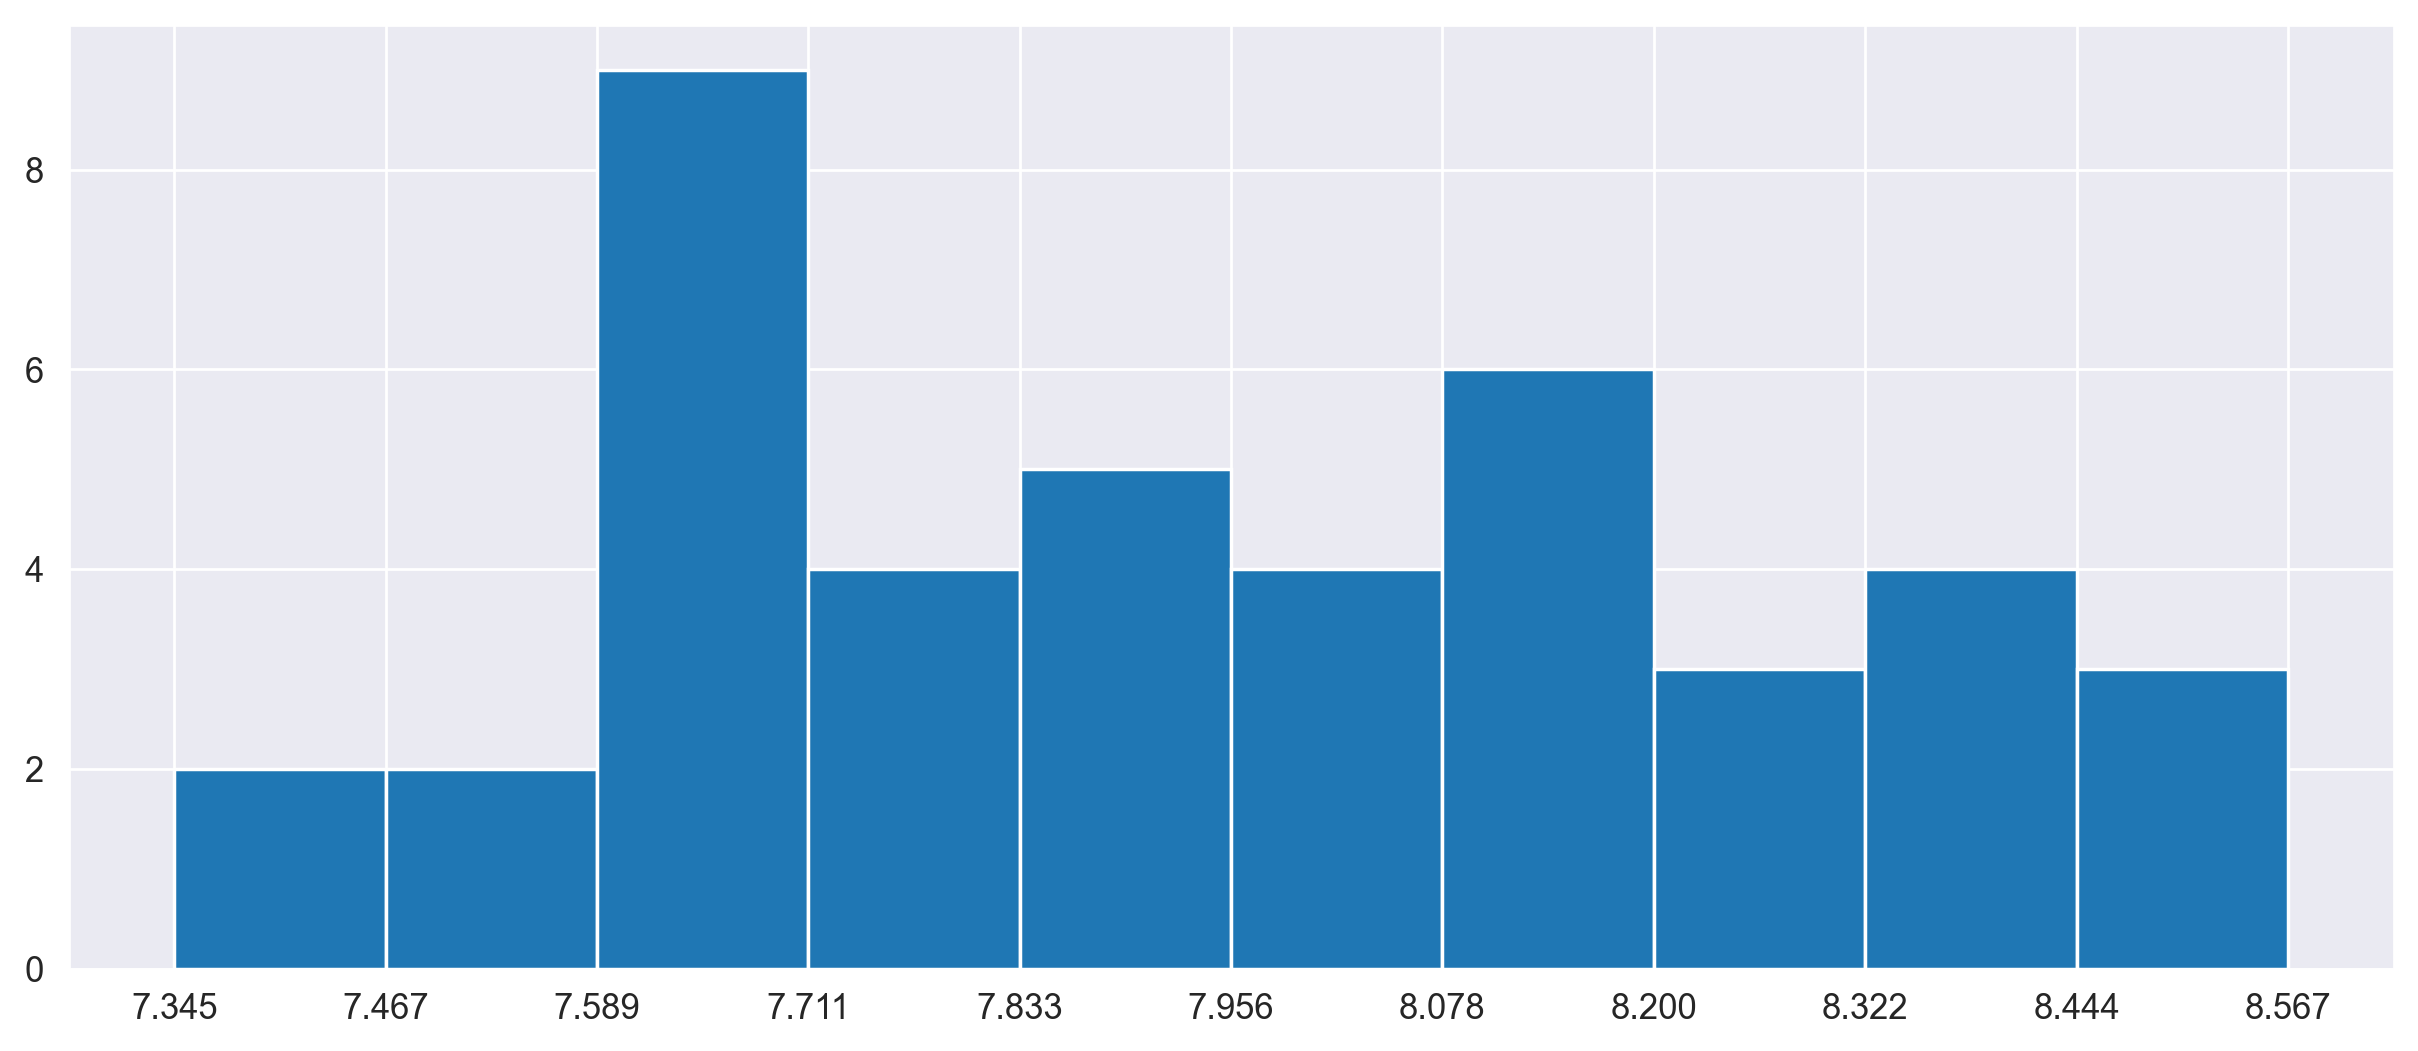

In [89]:
plt.figure(figsize=(12,5))
plt.hist(cocacola['log_Sales'], bins=10)
plt.xticks([7.34460212, 7.46679737, 7.58899262, 7.71118787, 7.83338312,
        7.95557837, 8.07777362, 8.19996887, 8.32216412, 8.44435937,
        8.56655462])
plt.show()

In [12]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

<AxesSubplot:>

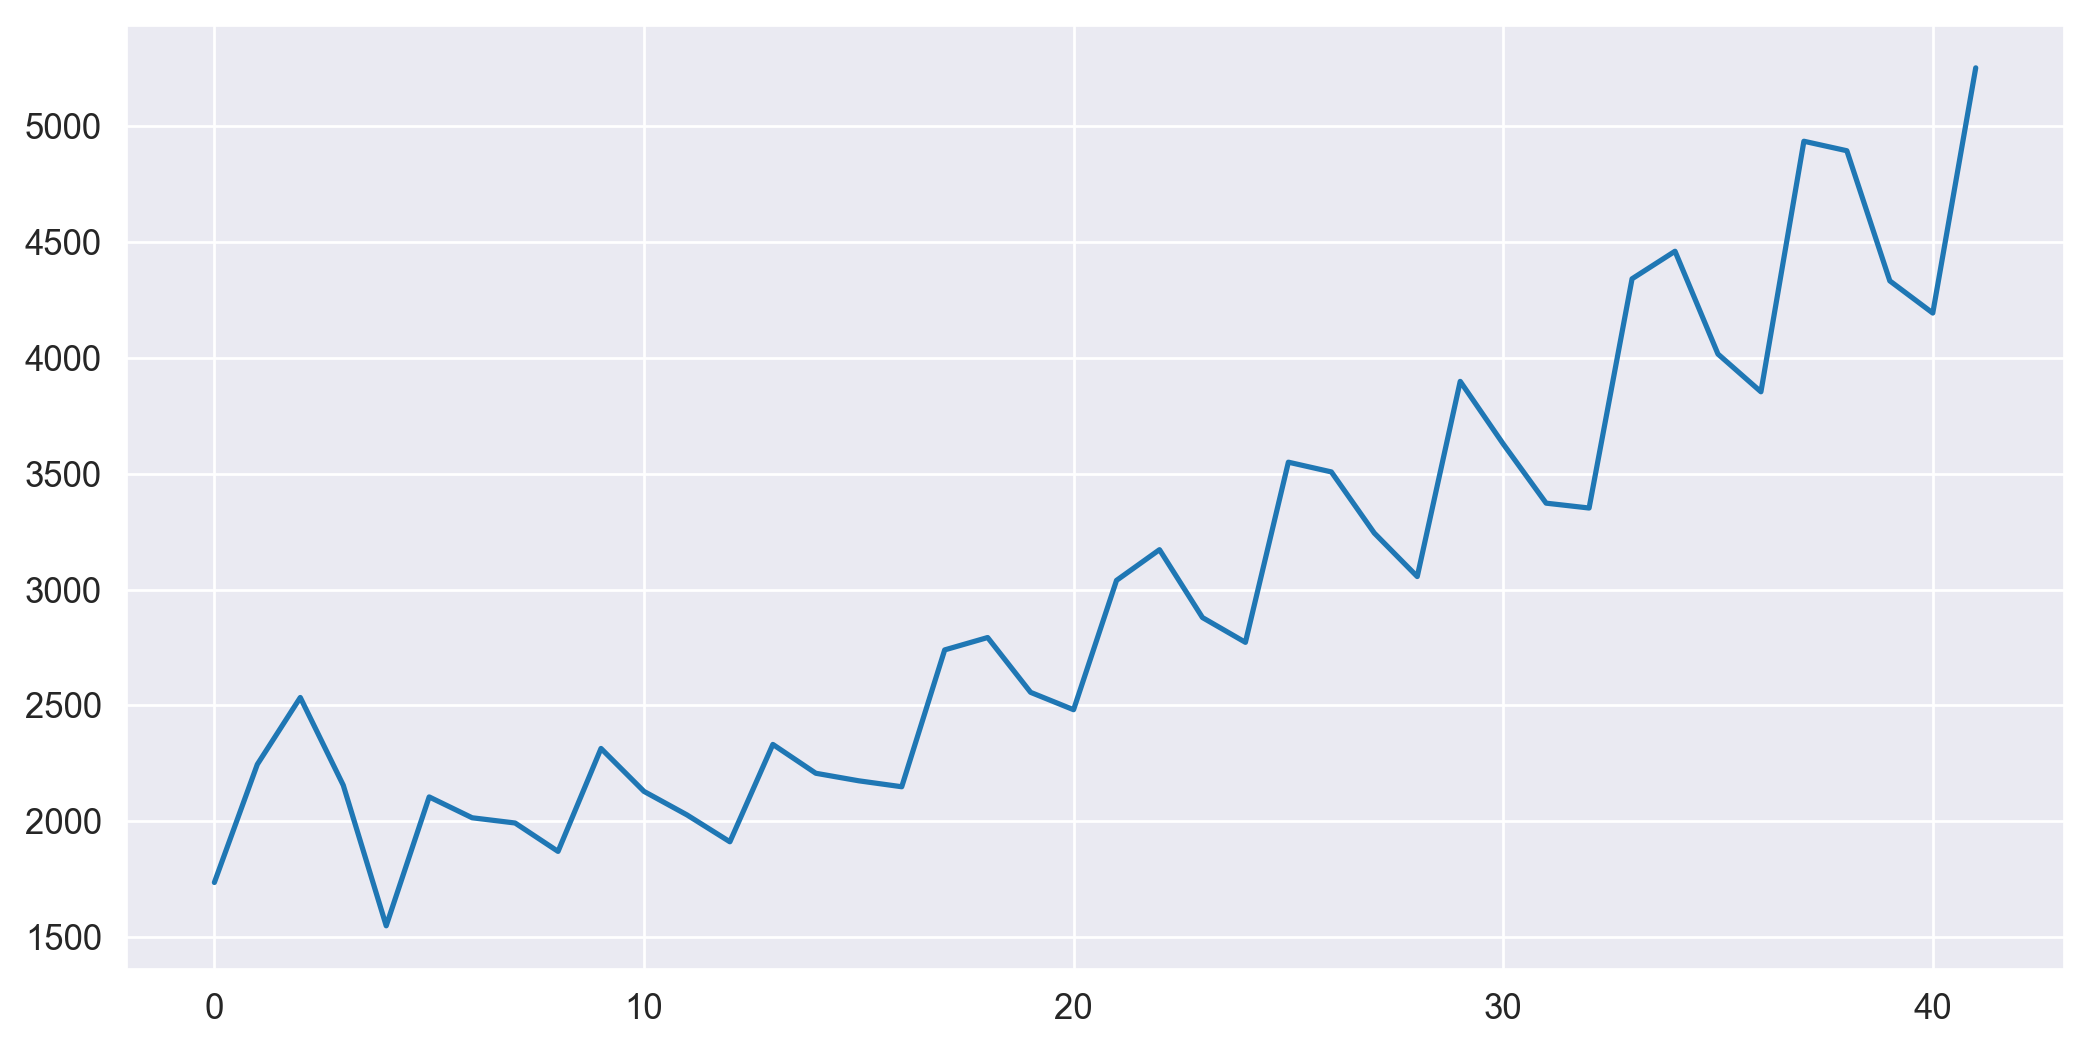

In [13]:
cocacola.Sales.plot()

<AxesSubplot:xlabel='Year', ylabel='Sales'>

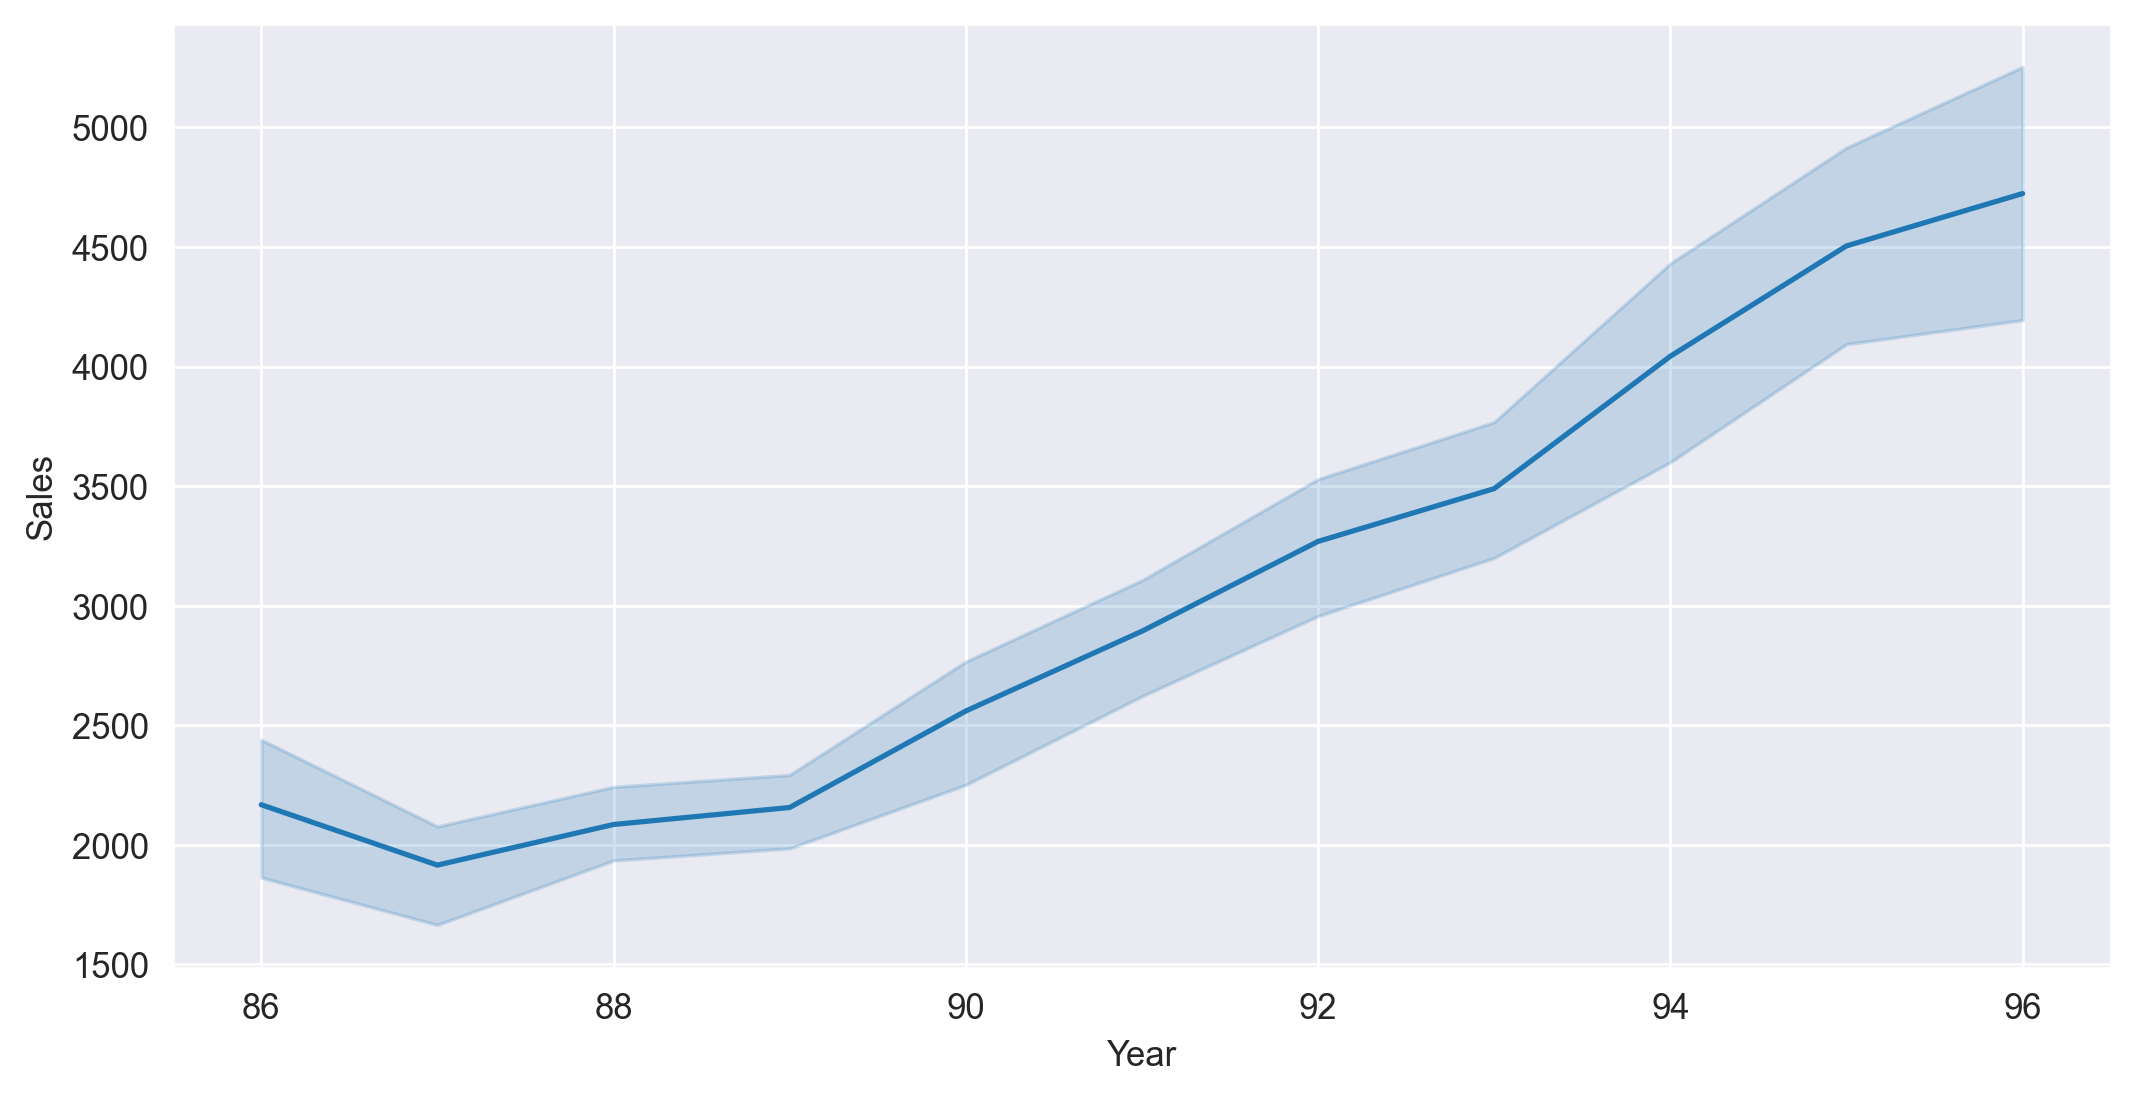

In [14]:
sns.lineplot(x="Year",y="Sales",data=cocacola)

In [15]:
cocacola['t'] = np.arange(1,len(cocacola)+1)

In [16]:
cocacola['t_square'] = cocacola['t'] ** 2

In [17]:
cocacola.head()

,Quarter,Year,Sales,log_Sales,t,t_square
0,1,86,1734.827000,7.458663,1,1
1,2,86,2244.960999,7.716443,2,4
2,3,86,2533.804993,7.837477,3,9
3,4,86,2154.962997,7.675529,4,16
4,1,87,1547.818996,7.344602,5,25


In [18]:
dummies = pd.get_dummies(cocacola['Quarter'])

In [19]:
dummies.head()

,1,2,3,4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [20]:
X = dummies
y = cocacola['Sales']
model = LinearRegression().fit(X, y)

In [21]:
model

LinearRegression()

In [22]:
quarterly_avg = cocacola.groupby('Quarter')['Sales'].mean()
cocacola['seasonal'] = cocacola['Sales'] - quarterly_avg[cocacola['Quarter']].values

In [23]:
cocacola.head()

,Quarter,Year,Sales,log_Sales,t,t_square,seasonal
0,1,86,1734.827000,7.458663,1,1,-894.223181
1,2,86,2244.960999,7.716443,2,4,-1096.220908
2,3,86,2533.804993,7.837477,3,9,-600.285806
3,4,86,2154.962997,7.675529,4,16,-719.974800
4,1,87,1547.818996,7.344602,5,25,-1081.231185


In [24]:
cocacola.shape

(42, 7)

In [25]:
Train = cocacola.head(32)
Test = cocacola.tail(10)

In [26]:
Test

,Quarter,Year,Sales,log_Sales,t,t_square,seasonal
32,1,94,3352.0,8.117312,33,1089,722.949819
33,2,94,4342.0,8.376090,34,1156,1000.818093
34,3,94,4461.0,8.403128,35,1225,1326.909202
35,4,94,4017.0,8.298291,36,1296,1142.062202
36,1,95,3854.0,8.256867,37,1369,1224.949819
37,2,95,4936.0,8.504311,38,1444,1594.818093
38,3,95,4895.0,8.495970,39,1521,1760.909202
39,4,95,4333.0,8.374015,40,1600,1458.062202
40,1,96,4194.0,8.341410,41,1681,1564.949819
41,2,96,5253.0,8.566555,42,1764,1911.818093


In [27]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Sales'], pred_linear))
rmse_linear

752.9233932767113

In [28]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['log_Sales'], pred_Exp))
rmse_Exp

0.13535411499114627

In [29]:
#Quadratic 

Quad = smf.ols('log_Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['log_Sales'],pred_Quad))
rmse_Quad

0.18296561792802069

In [30]:
#Additive seasonality 

add_sea = smf.ols('Sales~seasonal',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['seasonal']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea))
rmse_add_sea

301.39129069755614

In [31]:
add_sea_Quad = smf.ols('Sales~t+t_square+seasonal',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['seasonal','t','t_square']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

380.34508524574096

In [32]:
Mul_sea = smf.ols('log_Sales~seasonal',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_Mult_sea))
rmse_Mult_sea

4387.737473303958

In [33]:
#Multiplicative Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+seasonal',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_Mult_add_sea))
rmse_Mult_add_sea 

4387.791138263742

In [34]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,0.135354
2,rmse_Quad,0.182966
3,rmse_add_sea,301.391291
4,rmse_add_sea_quad,380.345085
0,rmse_linear,752.923393
5,rmse_Mult_sea,4387.737473
6,rmse_Mult_add_sea,4387.791138


<AxesSubplot:>

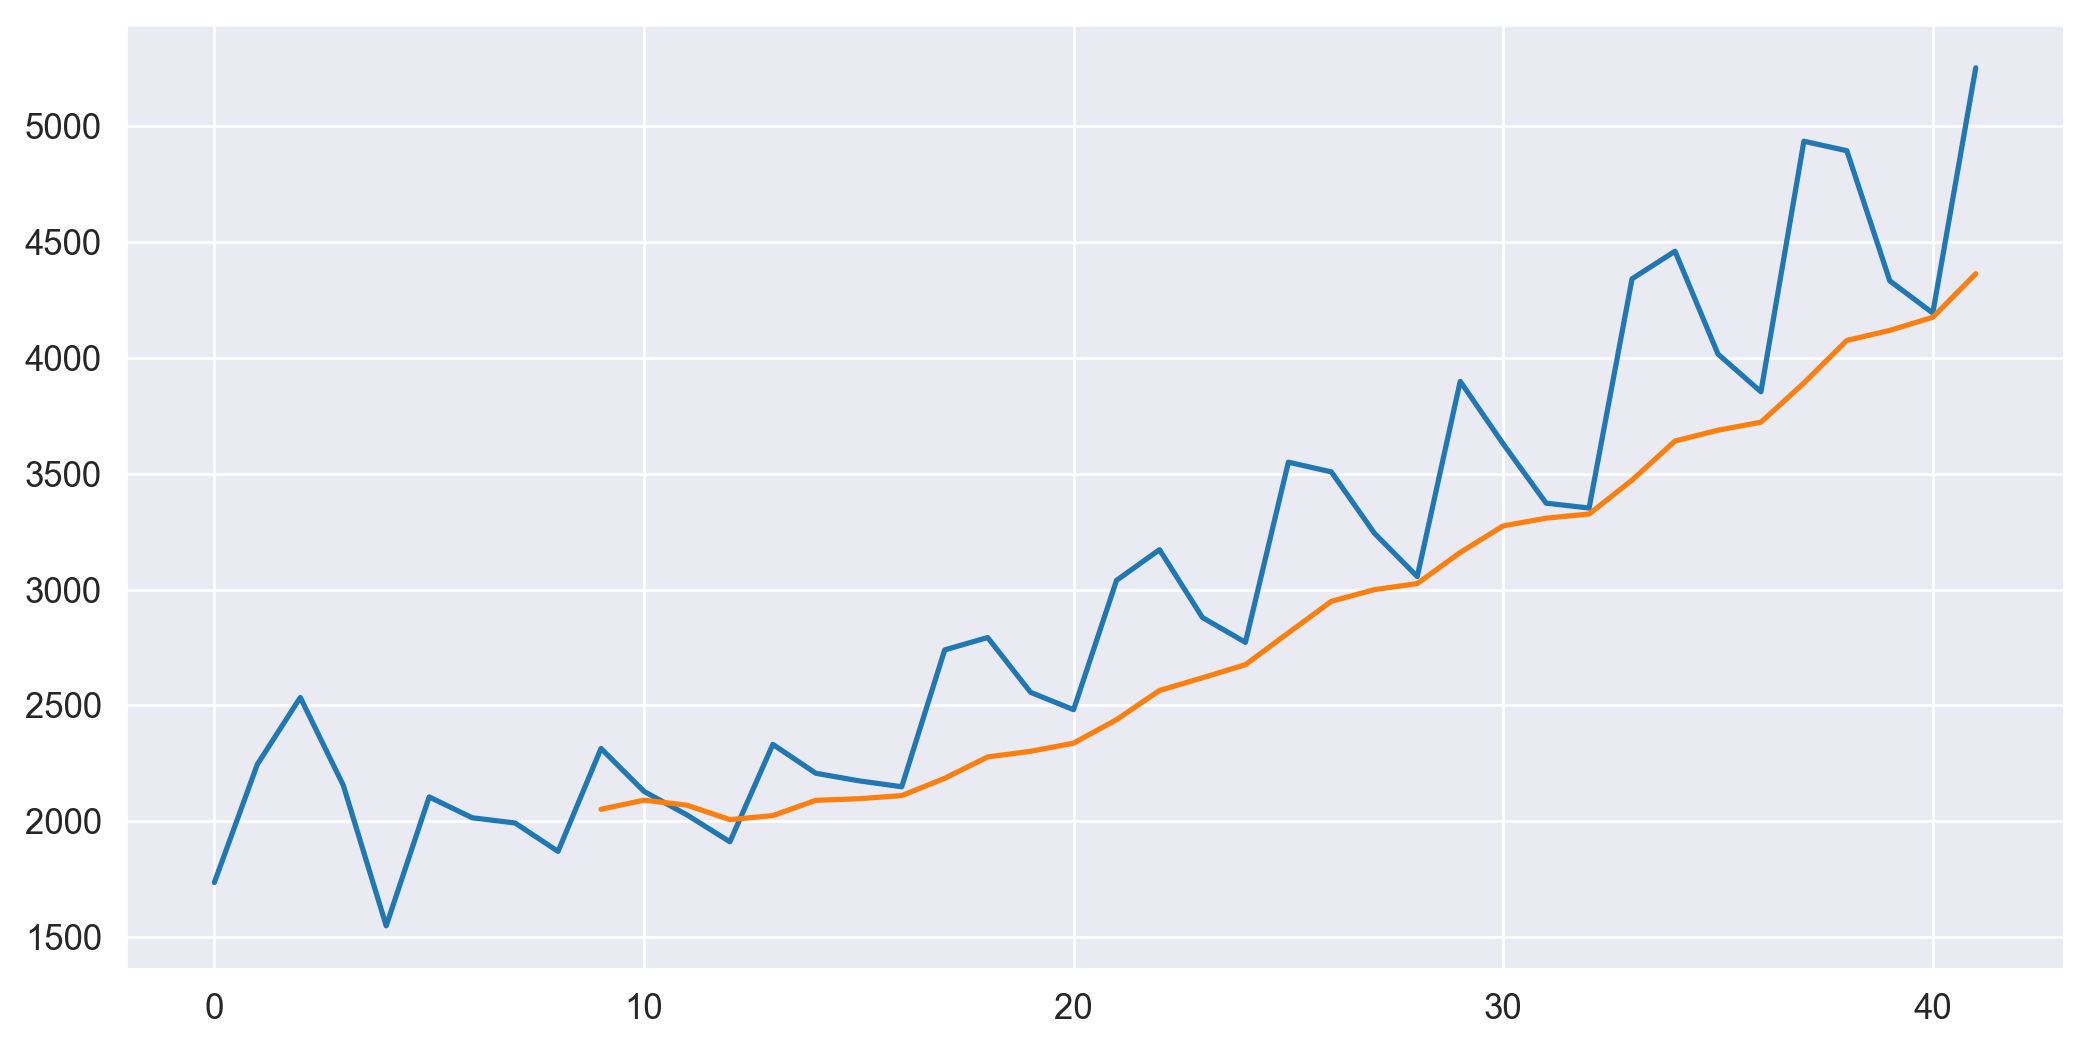

In [35]:
cocacola['Sales'].plot()
cocacola['Sales'].rolling(10).mean().plot()

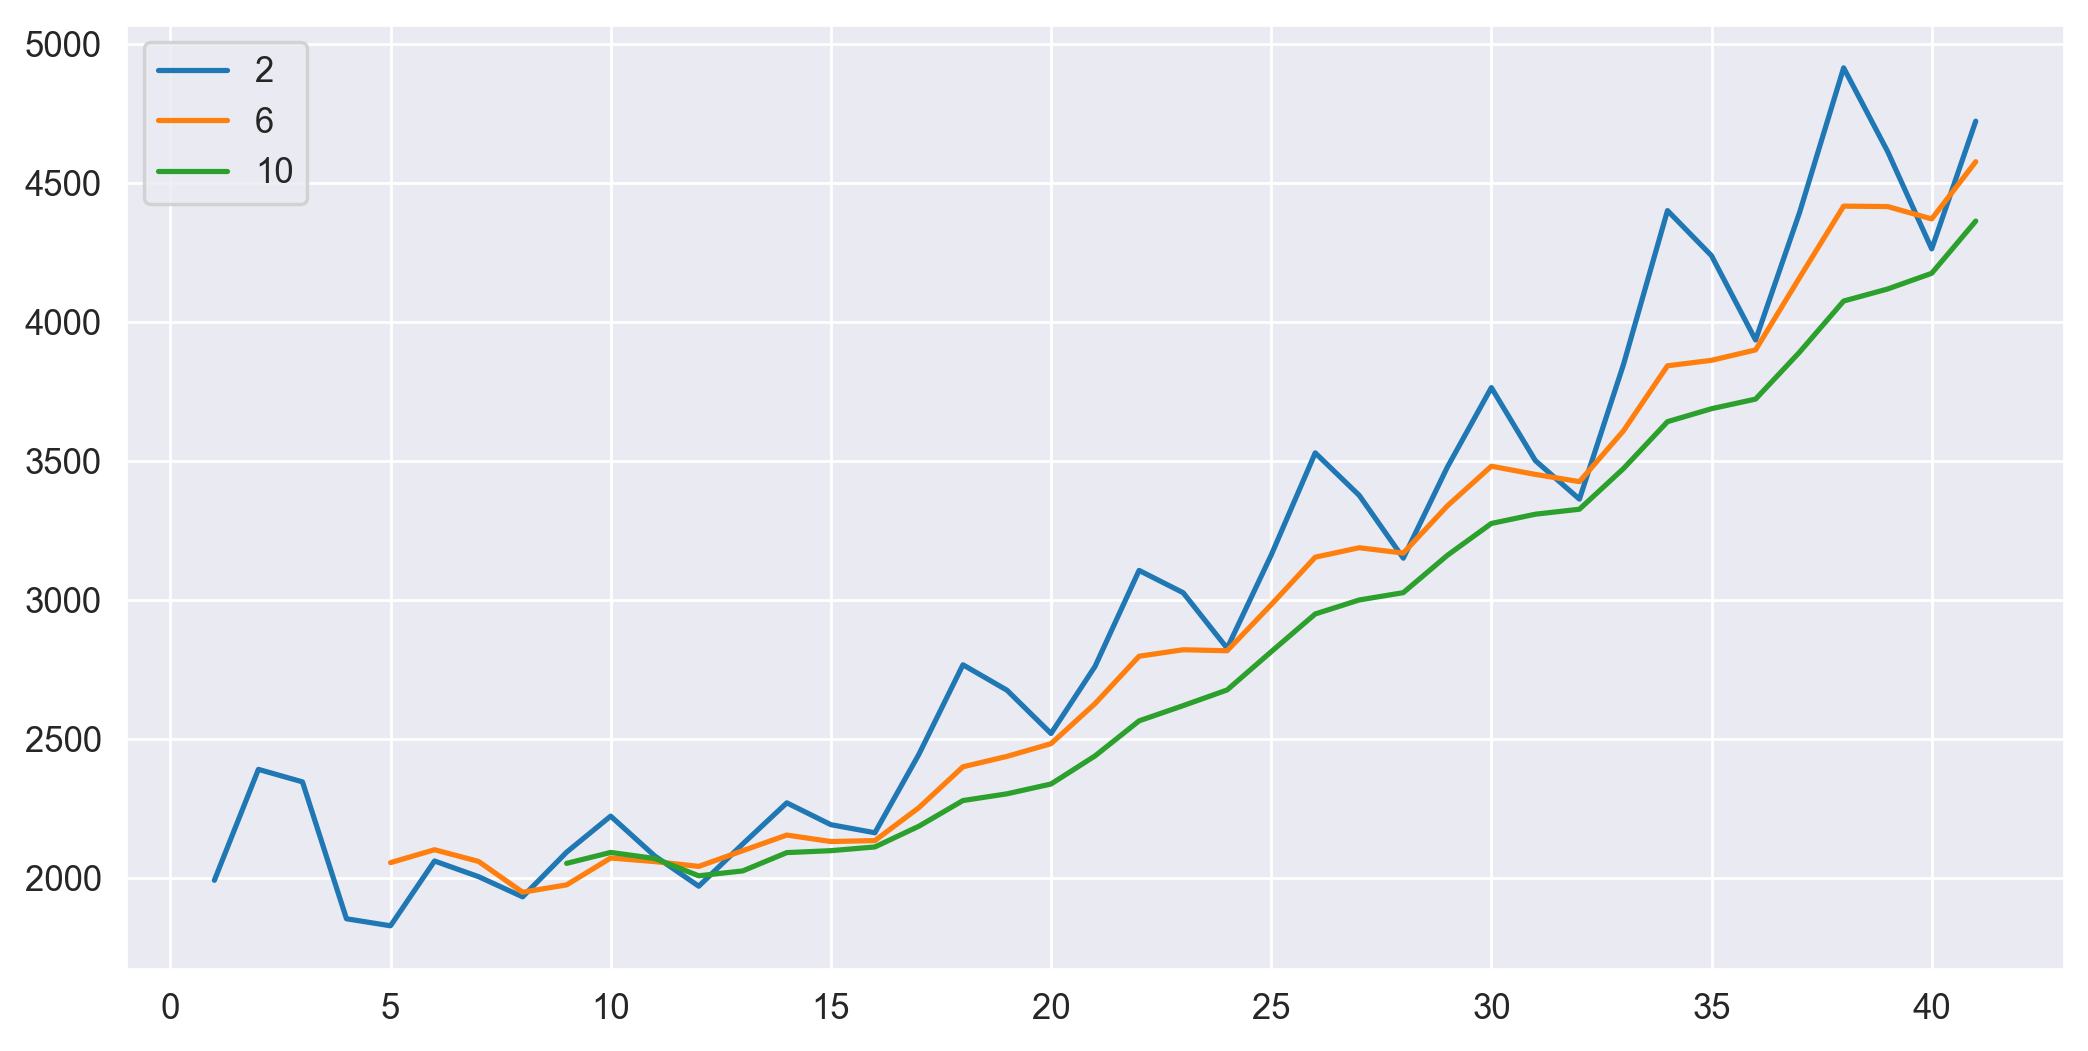

In [36]:
for i in range(2,12,4):
    cocacola['Sales'].rolling(i).mean().plot(label = str(i))
    plt.legend()

In [37]:
cocacola.head(1)

,Quarter,Year,Sales,log_Sales,t,t_square,seasonal
0,1,86,1734.827,7.458663,1,1,-894.223181


In this model I have created 4 dummy variables, which are t(Quadratic), t_square(Quadratic Square), log_Sales, seasonal (which represents the 4 quarters). Based on the RMSE values, Exponential Smoothing model have the lowest RMSE value and I will choose Exponentialmethod for forecasting 

In [38]:
#

# Forecast the Airlines data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [39]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [40]:
Airlines = pd.read_excel('Airlines+Data.xlsx',index_col=0, parse_dates=True)

In [41]:
Airlines

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [42]:
Airlines.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [43]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 1995-01-01 to 2002-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  96 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


In [44]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')

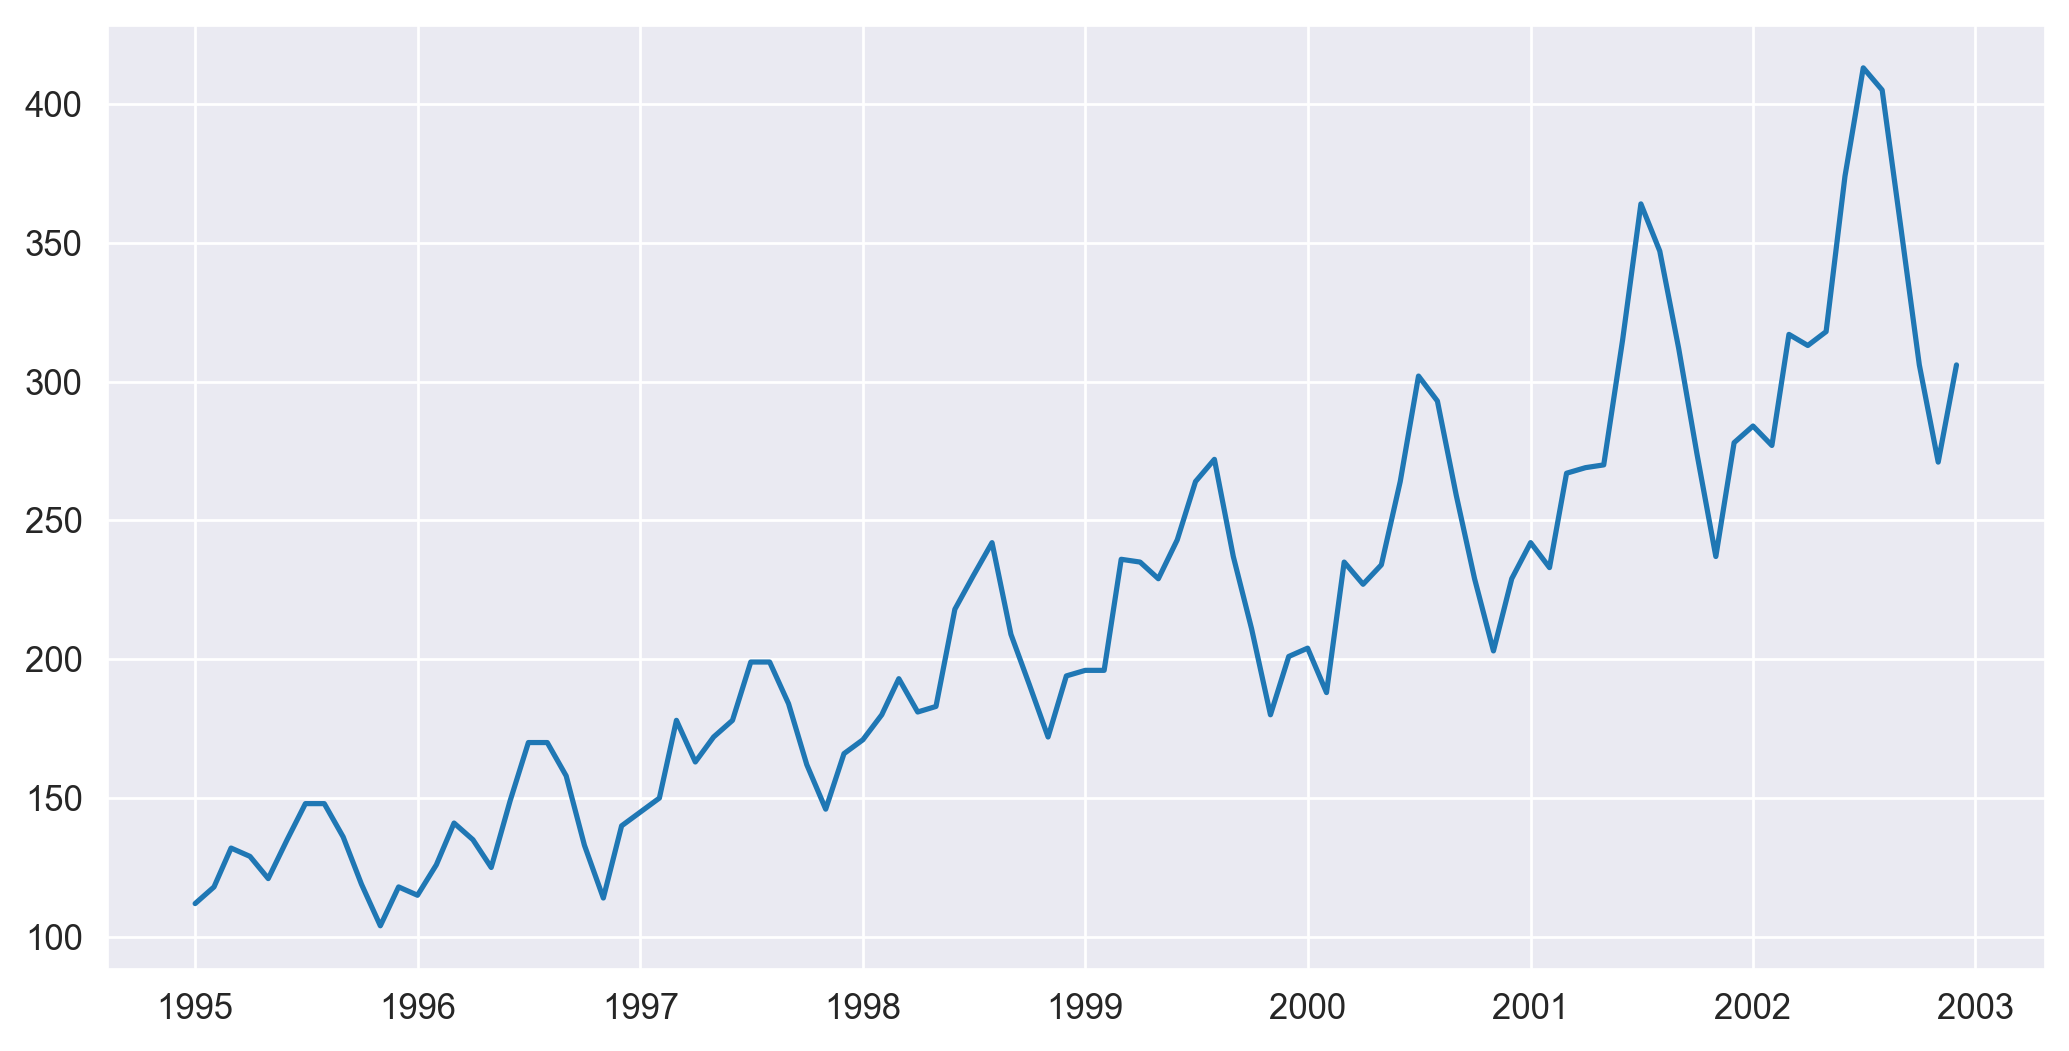

In [45]:
plt.plot(Airlines['Passengers'])

In [46]:
Airlines['First-Order'] = Airlines['Passengers'].diff(periods=1)
Airlines

,Passengers,First-Order
Month,,
1995-01-01,112,NaN
1995-02-01,118,6.0
1995-03-01,132,14.0
1995-04-01,129,-3.0
1995-05-01,121,-8.0
...,...,...
2002-08-01,405,-8.0
2002-09-01,355,-50.0
2002-10-01,306,-49.0


In [47]:
Airlines.dropna(inplace=True)

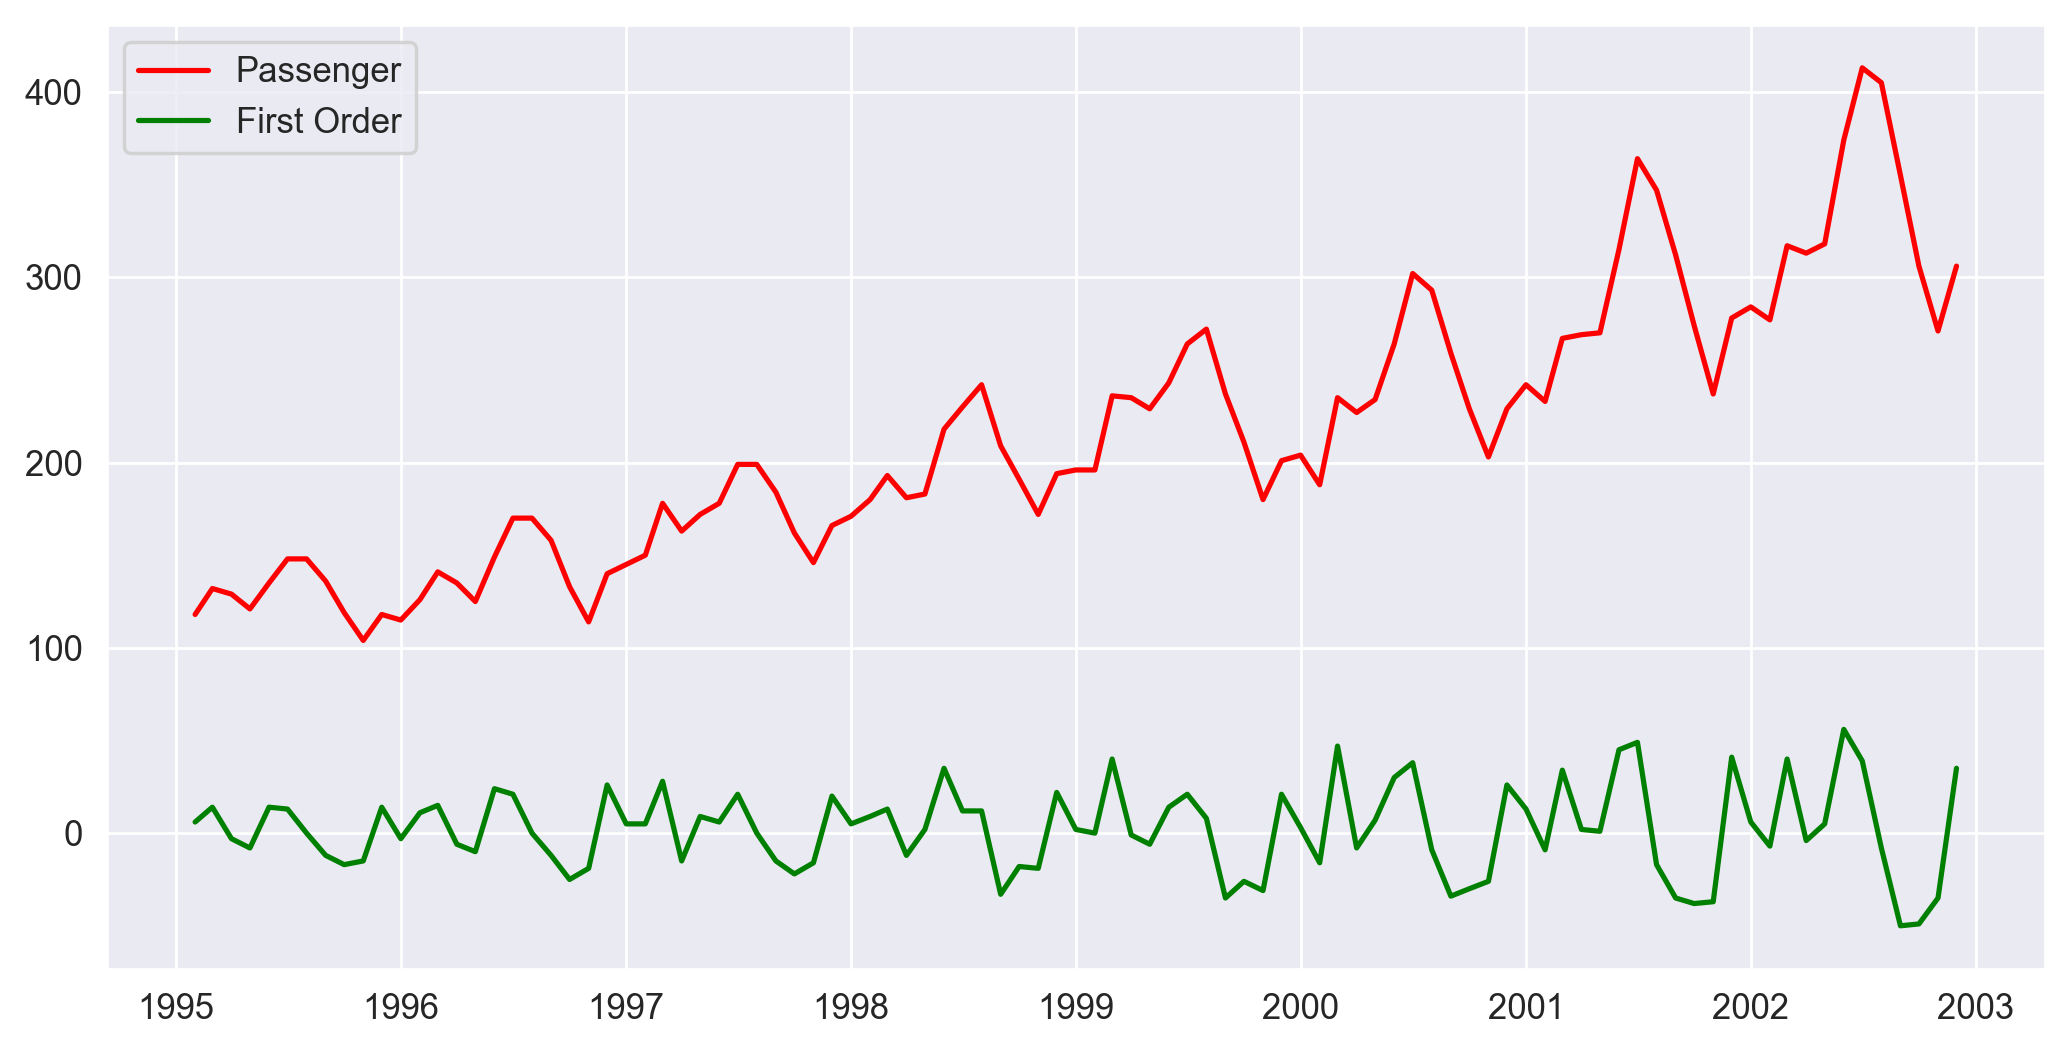

In [48]:
plt.plot(Airlines['Passengers'], color = 'red', label = 'Passenger')
plt.plot(Airlines['First-Order'], color = 'green', label = 'First Order')
plt.legend()

In [49]:
train = Airlines[:'2001']
test = Airlines['2002':]

In [50]:
acf_values = acf(train['First-Order'])
acf_values

array([ 1.        ,  0.20020217, -0.15708129, -0.1950149 , -0.27449989,
       -0.05054267,  0.02968717, -0.08028304, -0.29008832, -0.11005001,
       -0.12912322,  0.18852415,  0.72116408,  0.1818738 , -0.15950202,
       -0.12324431, -0.18578421, -0.0246063 , -0.00460204, -0.06086401])

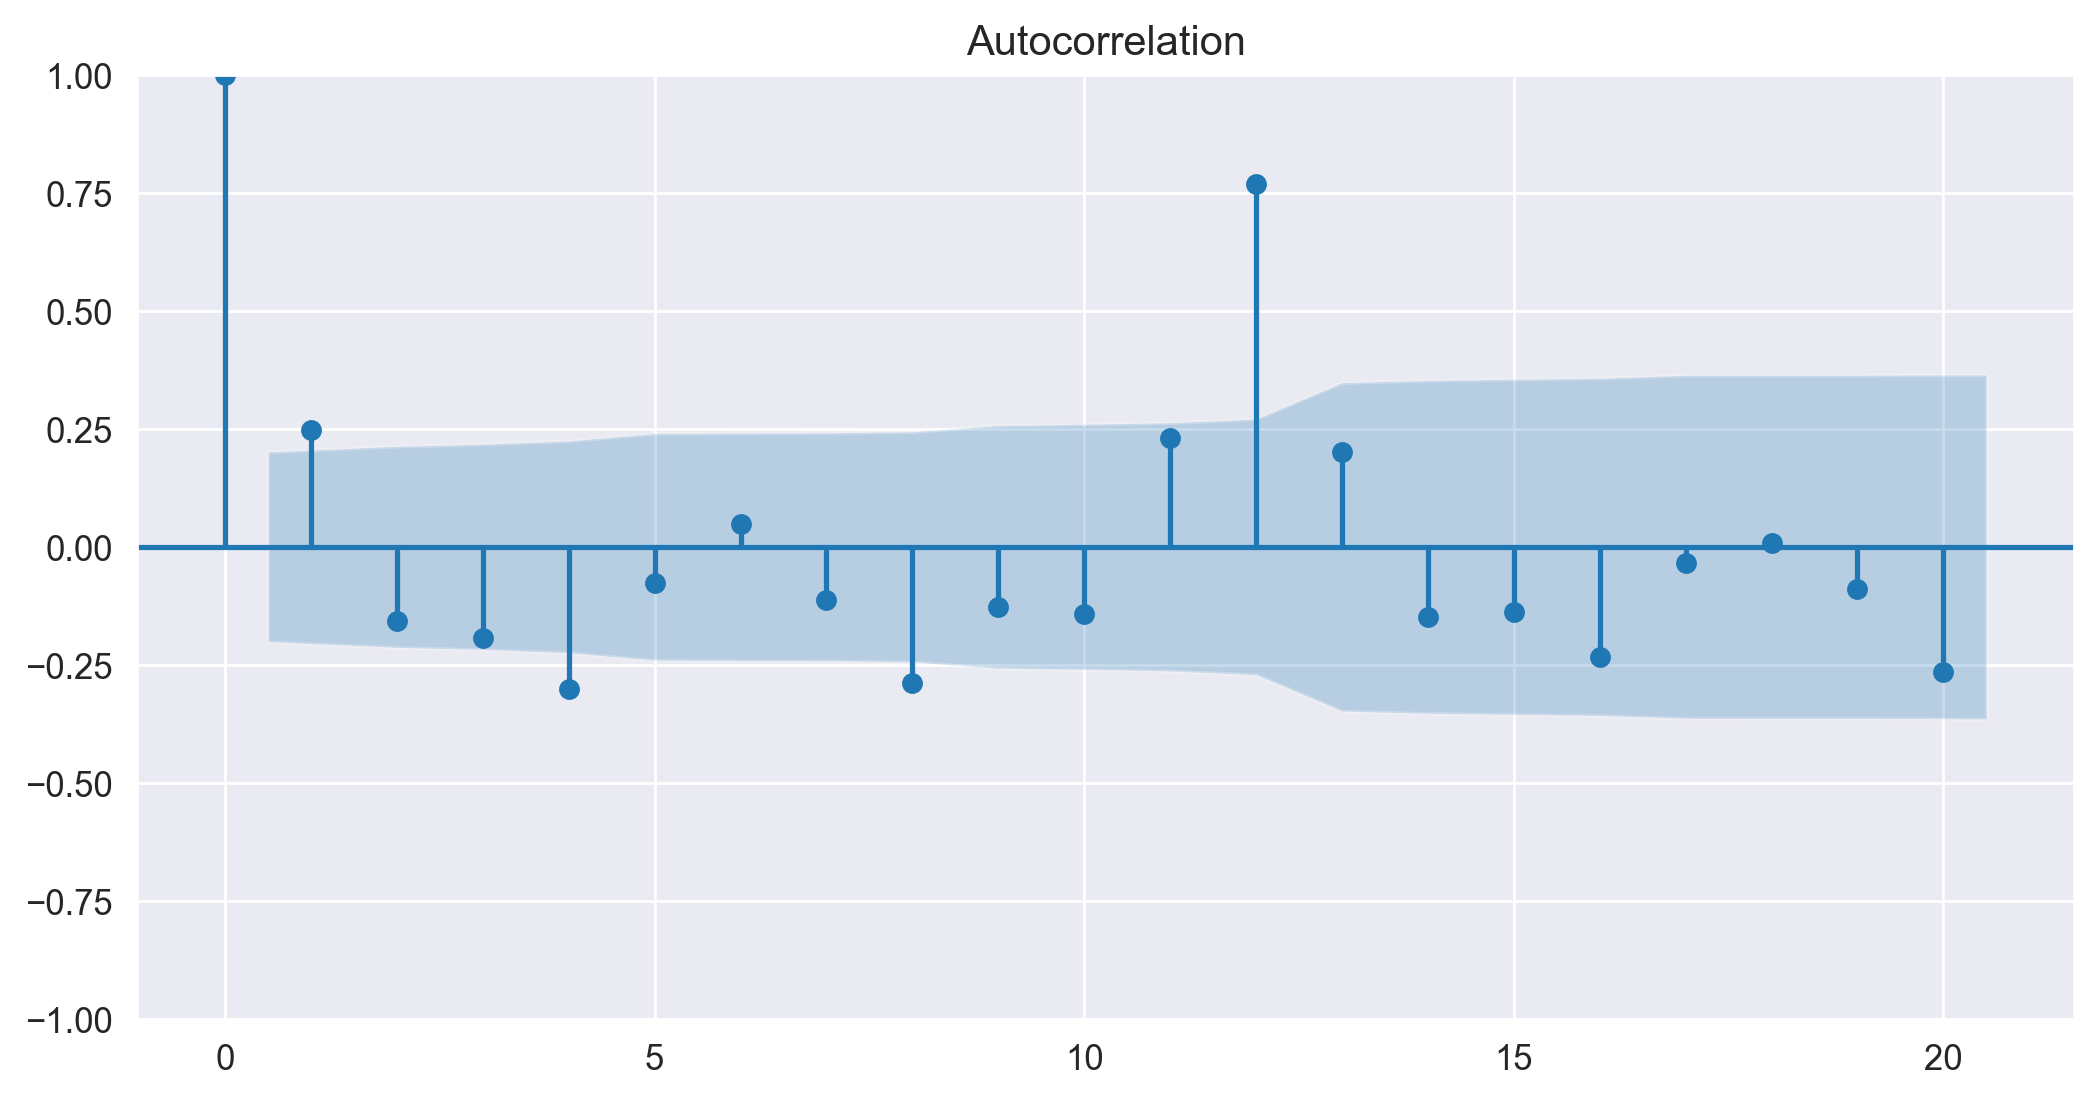

In [51]:
plot_acf(Airlines['First-Order'], lags=20);

In [52]:
pacf_val = pacf(train['First-Order'])
pacf_val

array([ 1.00000000e+00,  2.02643661e-01, -2.10675575e-01, -1.31110976e-01,
       -2.73714407e-01, -4.07196345e-03, -9.80730888e-02, -2.03304297e-01,
       -4.71095145e-01, -2.24801836e-01, -6.72428186e-01, -6.15005319e-01,
        2.62355500e-01, -2.19953053e-01, -6.13146437e-01, -3.57412986e-01,
       -8.84298676e-01, -8.43360268e+00,  1.15165795e+00,  7.50053179e-01])

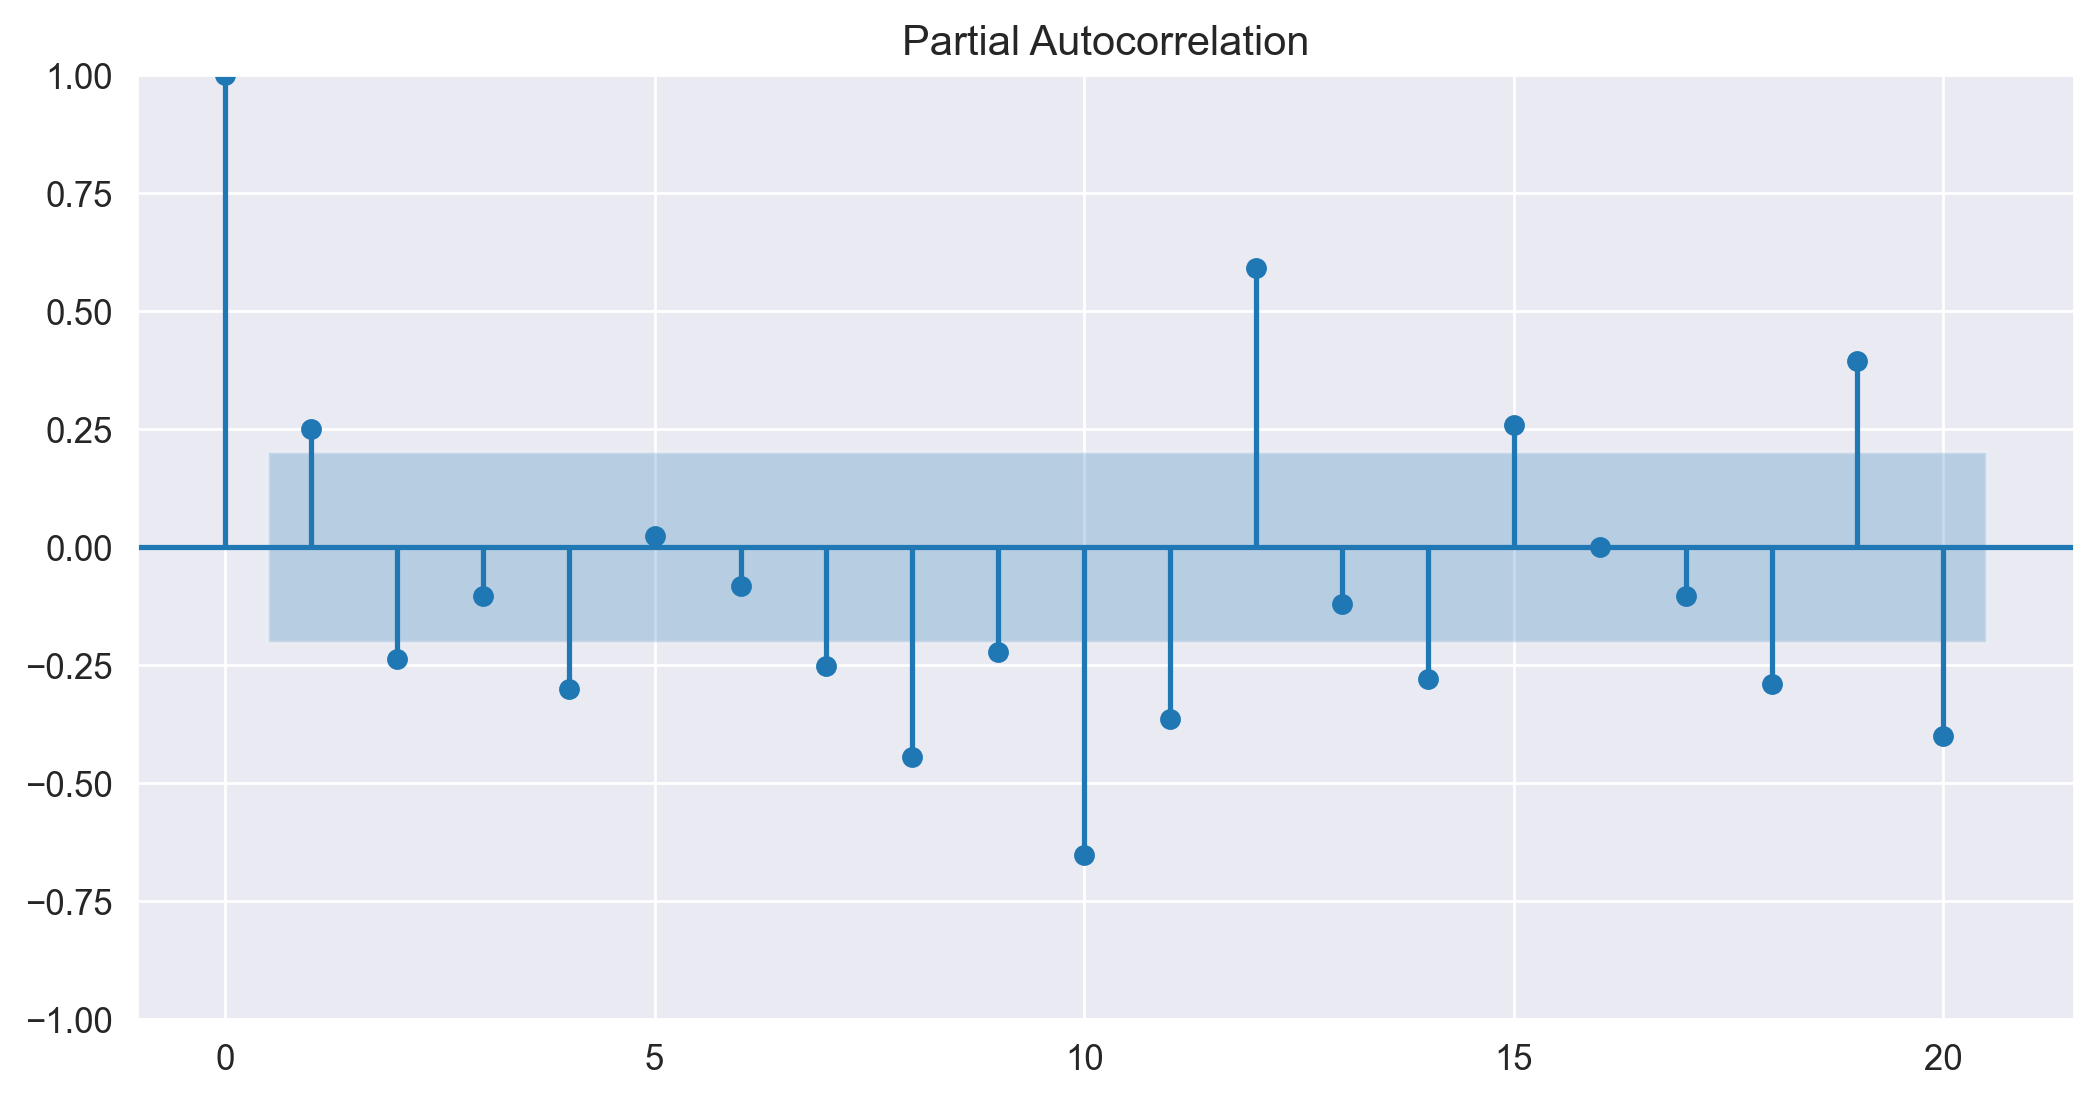

In [53]:
plot_pacf(Airlines['First-Order'], lags=20);

In [54]:
adfuller(Airlines['First-Order'])[1]

0.22488942647512583

 p>0.05; Data is not stationary

In [55]:
order = auto_arima(Airlines['First-Order'])

In [56]:
order

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [57]:
arima_model = ARIMA(train['First-Order'], order=(3, 0, 2)).fit()

C:\Users\jaevi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jaevi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\jaevi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [58]:
Airlines.shape

(95, 2)

In [59]:
train.shape

(83, 2)

In [60]:
ypred = arima_model.predict(start =84, end = 95 )
ypred

2002-02-01    3.573863
2002-03-01   -1.775964
2002-04-01   -5.256387
2002-05-01   -0.603147
2002-06-01    0.211863
2002-07-01    3.399077
2002-08-01    2.428196
2002-09-01    3.377503
2002-10-01    1.970046
2002-11-01    2.567939
2002-12-01    1.715374
2003-01-01    2.367723
Freq: MS, Name: predicted_mean, dtype: float64

In [63]:
arima_rmse = np.sqrt(mean_squared_error(test['First-Order'], ypred))

In [64]:
print("ARIMA Model RMSE:", arima_rmse)

ARIMA Model RMSE: 34.30574028859725


# Moving average method

In [65]:
Airlines = pd.read_excel('Airlines+Data.xlsx', index_col=0, parse_dates=True)

In [71]:
Airlines.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [72]:
train1 = Airlines[:'2001']
test1 = Airlines['2002':]

In [73]:
train1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


In [74]:
test1.head()

,Passengers
Month,
2002-01-01,284
2002-02-01,277
2002-03-01,317
2002-04-01,313
2002-05-01,318


In [80]:
window = 12
moving_avg_forecasts = test1.copy()
moving_avg_forecasts['Passengers'] = train1['Passengers'].rolling(window).mean().iloc[-1]
moving_avg_forecasts = moving_avg_forecasts['Passengers']

In [82]:
moving_avg_forecasts

Month
2002-01-01    284.0
2002-02-01    284.0
2002-03-01    284.0
2002-04-01    284.0
2002-05-01    284.0
2002-06-01    284.0
2002-07-01    284.0
2002-08-01    284.0
2002-09-01    284.0
2002-10-01    284.0
2002-11-01    284.0
2002-12-01    284.0
Name: Passengers, dtype: float64

In [81]:
moving_avg_rmse = mean_squared_error(test1, moving_avg_forecasts, squared=False)

print("Moving Average Model RMSE:", moving_avg_rmse)

Moving Average Model RMSE: 63.70177914836184


# Naive Approach

In [83]:
train2 = Airlines[:'2001']
test2 = Airlines['2002':]

naive_forecasts = pd.Series(train2['Passengers'].iloc[-1], index=test.index)

In [85]:
naive_rmse = mean_squared_error(test2, naive_forecasts, squared=False)

print("Naive Approach RMSE:", naive_rmse)

Naive Approach RMSE: 68.00673986206563


In [87]:
data1 = {"MODEL":pd.Series(["ARIMA","Moving_Average","Naive"]),"RMSE_Values":pd.Series([arima_rmse, moving_avg_rmse, naive_rmse])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,ARIMA,34.305740
1,Moving_Average,63.701779
2,Naive,68.006740


For Airlines Data using Arima model I have created 1 dummy variable of First-Order for differencing and no dummy variables created for Moving average and Naive method.
Based on the RMSE values Arima model has the lowest value of 34.305 and can be used for forecasting